In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-36.54533708700354 80.40576952858748
-27.517544458016424 -38.49365380408037
6.73202121098349 -92.9551533464237
-79.24667149823375 -65.16478260603446
-16.24458521449378 149.09691098309145
-67.18720848594647 -44.07821265666851
-34.03982864268876 -12.450050637211405
-42.43038706793377 68.33623427583493
43.51489547097745 78.95639530509771
51.89569452337747 -12.253358477678319
-6.100080858749877 171.75856632167165
-64.06134938608584 16.598250224407337
-49.08202340406515 -77.19500840920342
-15.18399626684743 -119.28076775195598
-28.295364677525413 -75.54277377284488
-64.66652244541038 13.078102807766129
-6.000300946809546 47.50371638433279
-2.3248070476031444 74.59321353058203
-12.464628103095691 159.3183634404533
-54.25633049856007 145.29653463393691
60.396574938126435 115.02875721551442
14.977083322069404 -10.266401371234508
40.53436842388311 -146.16738933172192
10.342811300177871 51.69050708147205
-22.618896844701112 -2.882665430537287
13.511797666017841 -162.4413782644582
-20.94090798373

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | san jose
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | innisfail
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | tyup
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | lolua
City not found. Skipping...
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | coihaique
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | coquimbo
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | mitsamiouli
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | honiara
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | lensk
Processing Record 21 of Set 1 | nioro
Processing Record 22 of Set 1 | kodiak
Processing Record 

City not found. Skipping...
Processing Record 40 of Set 4 | peleduy
Processing Record 41 of Set 4 | ngunguru
Processing Record 42 of Set 4 | yellowknife
Processing Record 43 of Set 4 | bubaque
Processing Record 44 of Set 4 | rosarito
Processing Record 45 of Set 4 | barinas
Processing Record 46 of Set 4 | harper
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | arman
Processing Record 50 of Set 4 | mezhdurechensk
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | aitape
Processing Record 3 of Set 5 | pevek
Processing Record 4 of Set 5 | tenenkou
Processing Record 5 of Set 5 | inuvik
Processing Record 6 of Set 5 | kisangani
Processing Record 7 of Set 5 | kerki
City not found. Skipping...
Processing Record 8 of Set 5 | los llanos de aridane
Processing Record 9 of Set 5 | kahului
Processing Record 10 of Set 5 | puerto leguizamo
Processing Record 11 of Set 5 | gornopravdinsk
Processing Record 12 of Set 5 | 

Processing Record 29 of Set 8 | gat
Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | kysyl-syr
Processing Record 32 of Set 8 | nanpiao
Processing Record 33 of Set 8 | najran
Processing Record 34 of Set 8 | kuche
City not found. Skipping...
Processing Record 35 of Set 8 | cambridge
Processing Record 36 of Set 8 | bria
Processing Record 37 of Set 8 | mocambique
City not found. Skipping...
Processing Record 38 of Set 8 | masyaf
Processing Record 39 of Set 8 | gunnedah
Processing Record 40 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 8 | chuy
Processing Record 42 of Set 8 | ziarat
Processing Record 43 of Set 8 | banjarmasin
Processing Record 44 of Set 8 | tobermory
Processing Record 45 of Set 8 | fairbanks
Processing Record 46 of Set 8 | impfondo
Processing Record 47 of Set 8 | hammerfest
Processing Record 48 of Set 8 | alyangula
Processing Record 49 of Set 8 | sola
Processing Record 50 of Set 

Processing Record 14 of Set 12 | bethel
Processing Record 15 of Set 12 | qidong
Processing Record 16 of Set 12 | san carlos de bariloche
Processing Record 17 of Set 12 | tezu
Processing Record 18 of Set 12 | mainit
Processing Record 19 of Set 12 | salinopolis
Processing Record 20 of Set 12 | tarnogskiy gorodok
Processing Record 21 of Set 12 | teguise
Processing Record 22 of Set 12 | zyryanka
Processing Record 23 of Set 12 | brive-la-gaillarde
Processing Record 24 of Set 12 | nalhati
Processing Record 25 of Set 12 | benjamin hill
Processing Record 26 of Set 12 | bayan
Processing Record 27 of Set 12 | salta
Processing Record 28 of Set 12 | hami
Processing Record 29 of Set 12 | tazmalt
Processing Record 30 of Set 12 | mackay
Processing Record 31 of Set 12 | moree
Processing Record 32 of Set 12 | durant
Processing Record 33 of Set 12 | misratah
Processing Record 34 of Set 12 | cozumel
Processing Record 35 of Set 12 | dromolaxia
Processing Record 36 of Set 12 | aguimes
Processing Record 37 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,71.85,73,75,11.50,MU,2022-07-16 19:18:04
1,Arraial Do Cabo,-22.9661,-42.0278,76.86,69,0,12.66,BR,2022-07-16 19:15:16
2,San Jose,37.3394,-121.8950,92.91,46,0,5.75,US,2022-07-16 19:17:10
3,Ushuaia,-54.8000,-68.3000,40.66,65,20,9.22,AR,2022-07-16 19:13:11
4,Innisfail,-17.5333,146.0333,65.70,88,84,5.66,AU,2022-07-16 19:18:05
5,Jamestown,42.0970,-79.2353,83.05,36,0,6.91,US,2022-07-16 19:18:05
6,Souillac,-20.5167,57.5167,71.98,73,75,11.50,MU,2022-07-16 19:16:31
7,Tyup,42.7276,78.3648,58.44,44,0,2.98,KG,2022-07-16 19:18:06
8,Dingle,10.9995,122.6711,75.67,93,91,1.34,PH,2022-07-16 19:18:06
9,Bredasdorp,-34.5322,20.0403,62.19,42,100,5.59,ZA,2022-07-16 19:18:07


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bambous Virieux,MU,2022-07-16 19:18:04,-20.3428,57.7575,71.85,73,75,11.50
1,Arraial Do Cabo,BR,2022-07-16 19:15:16,-22.9661,-42.0278,76.86,69,0,12.66
2,San Jose,US,2022-07-16 19:17:10,37.3394,-121.8950,92.91,46,0,5.75
3,Ushuaia,AR,2022-07-16 19:13:11,-54.8000,-68.3000,40.66,65,20,9.22
4,Innisfail,AU,2022-07-16 19:18:05,-17.5333,146.0333,65.70,88,84,5.66
5,Jamestown,US,2022-07-16 19:18:05,42.0970,-79.2353,83.05,36,0,6.91
6,Souillac,MU,2022-07-16 19:16:31,-20.5167,57.5167,71.98,73,75,11.50
7,Tyup,KG,2022-07-16 19:18:06,42.7276,78.3648,58.44,44,0,2.98
8,Dingle,PH,2022-07-16 19:18:06,10.9995,122.6711,75.67,93,91,1.34
9,Bredasdorp,ZA,2022-07-16 19:18:07,-34.5322,20.0403,62.19,42,100,5.59


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

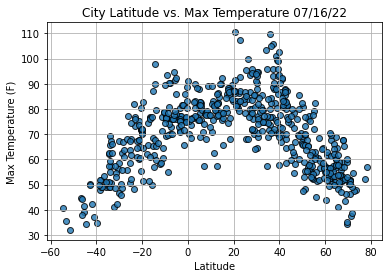

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

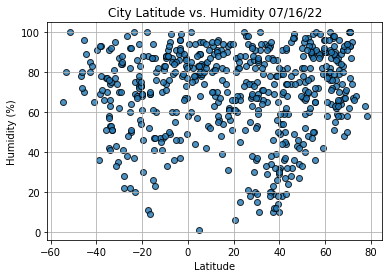

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

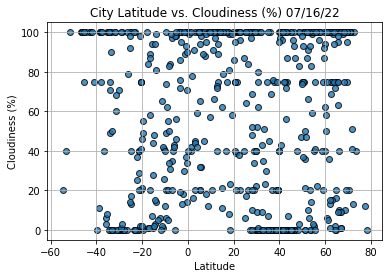

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

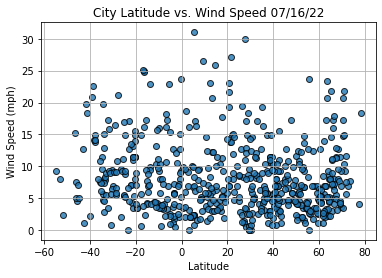

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
573     True
574     True
575     True
576     True
577     True
Name: Lat, Length: 578, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,San Jose,US,2022-07-16 19:17:10,37.3394,-121.8950,92.91,46,0,5.75
5,Jamestown,US,2022-07-16 19:18:05,42.0970,-79.2353,83.05,36,0,6.91
7,Tyup,KG,2022-07-16 19:18:06,42.7276,78.3648,58.44,44,0,2.98
8,Dingle,PH,2022-07-16 19:18:06,10.9995,122.6711,75.67,93,91,1.34
18,Lensk,RU,2022-07-16 19:18:10,60.7253,114.9278,55.74,90,100,4.32


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

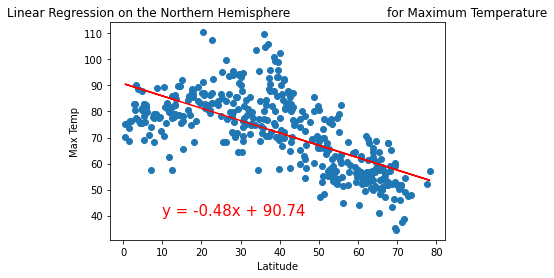

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

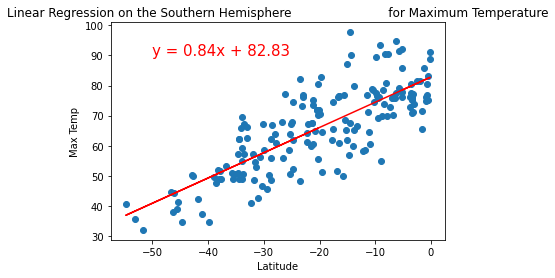

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

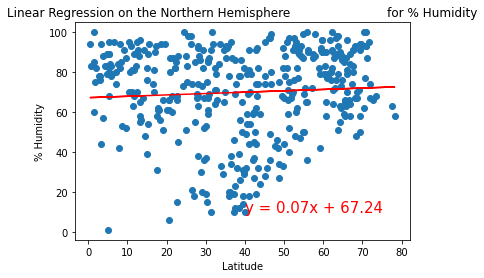

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

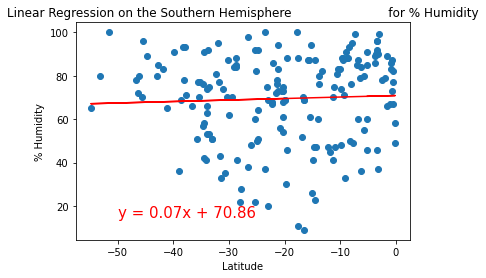

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

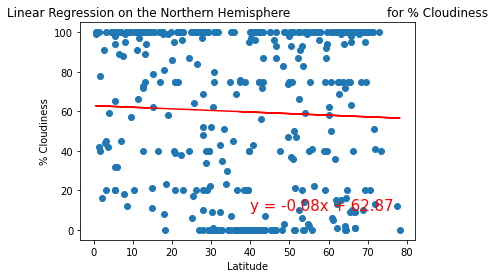

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

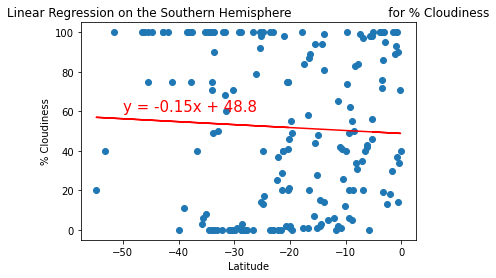

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

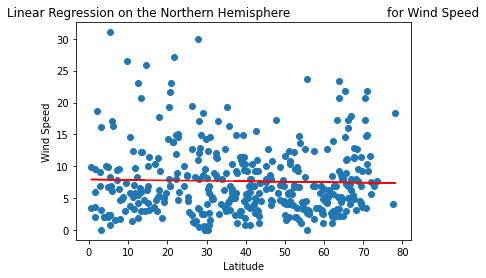

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

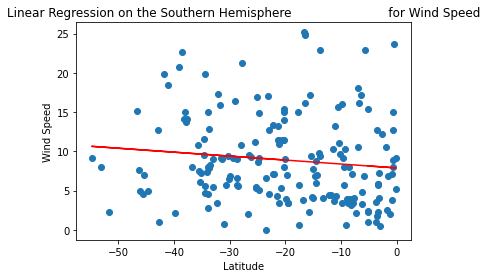

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))